In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read the CSV files
total_population_df = pd.read_csv('/kaggle/input/population/total.csv')
male_population_df = pd.read_csv('/kaggle/input/population/male.csv')
female_population_df = pd.read_csv('/kaggle/input/population/female.csv')

In [3]:
# Manually create a list of the top 20 most populated countries
top_20_countries = [
    "China", "India", "United States", "Indonesia", "Pakistan", 
    "Brazil", "Nigeria", "Bangladesh", "Russian Federation", "Mexico", 
    "Japan", "Ethiopia", "Philippines", "Egypt, Arab Rep.", "Viet Nam", 
    "France", "Turkiye", "Iran, Islamic Rep.", "Germany", "Thailand"
]

In [4]:
top_20_countries

['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Nigeria',
 'Bangladesh',
 'Russian Federation',
 'Mexico',
 'Japan',
 'Ethiopia',
 'Philippines',
 'Egypt, Arab Rep.',
 'Viet Nam',
 'France',
 'Turkiye',
 'Iran, Islamic Rep.',
 'Germany',
 'Thailand']

In [5]:
# Filter the DataFrames to include only the top 20 countries
total_population_df = total_population_df[total_population_df['Country Name'].isin(top_20_countries)]
male_population_df = male_population_df[male_population_df['Country Name'].isin(top_20_countries)]
female_population_df = female_population_df[female_population_df['Country Name'].isin(top_20_countries)]

In [6]:
total_population_df.head

<bound method NDFrame.head of            Country Name Country Code     Indicator Name Indicator Code  \
20           Bangladesh          BGD  Population, total    SP.POP.TOTL   
29               Brazil          BRA  Population, total    SP.POP.TOTL   
40                China          CHN  Population, total    SP.POP.TOTL   
55              Germany          DEU  Population, total    SP.POP.TOTL   
67     Egypt, Arab Rep.          EGY  Population, total    SP.POP.TOTL   
72             Ethiopia          ETH  Population, total    SP.POP.TOTL   
77               France          FRA  Population, total    SP.POP.TOTL   
106           Indonesia          IDN  Population, total    SP.POP.TOTL   
109               India          IND  Population, total    SP.POP.TOTL   
112  Iran, Islamic Rep.          IRN  Population, total    SP.POP.TOTL   
119               Japan          JPN  Population, total    SP.POP.TOTL   
154              Mexico          MEX  Population, total    SP.POP.TOTL   
174     

In [7]:
female_population_df.head

<bound method NDFrame.head of            Country Name Country Code      Indicator Name     Indicator Code  \
20           Bangladesh          BGD  Population, female  SP.POP.TOTL.FE.IN   
29               Brazil          BRA  Population, female  SP.POP.TOTL.FE.IN   
40                China          CHN  Population, female  SP.POP.TOTL.FE.IN   
55              Germany          DEU  Population, female  SP.POP.TOTL.FE.IN   
67     Egypt, Arab Rep.          EGY  Population, female  SP.POP.TOTL.FE.IN   
72             Ethiopia          ETH  Population, female  SP.POP.TOTL.FE.IN   
77               France          FRA  Population, female  SP.POP.TOTL.FE.IN   
106           Indonesia          IDN  Population, female  SP.POP.TOTL.FE.IN   
109               India          IND  Population, female  SP.POP.TOTL.FE.IN   
112  Iran, Islamic Rep.          IRN  Population, female  SP.POP.TOTL.FE.IN   
119               Japan          JPN  Population, female  SP.POP.TOTL.FE.IN   
154              Mexic

In [8]:
male_population_df.head

<bound method NDFrame.head of            Country Name Country Code    Indicator Name     Indicator Code  \
20           Bangladesh          BGD  Population, male  SP.POP.TOTL.MA.IN   
29               Brazil          BRA  Population, male  SP.POP.TOTL.MA.IN   
40                China          CHN  Population, male  SP.POP.TOTL.MA.IN   
55              Germany          DEU  Population, male  SP.POP.TOTL.MA.IN   
67     Egypt, Arab Rep.          EGY  Population, male  SP.POP.TOTL.MA.IN   
72             Ethiopia          ETH  Population, male  SP.POP.TOTL.MA.IN   
77               France          FRA  Population, male  SP.POP.TOTL.MA.IN   
106           Indonesia          IDN  Population, male  SP.POP.TOTL.MA.IN   
109               India          IND  Population, male  SP.POP.TOTL.MA.IN   
112  Iran, Islamic Rep.          IRN  Population, male  SP.POP.TOTL.MA.IN   
119               Japan          JPN  Population, male  SP.POP.TOTL.MA.IN   
154              Mexico          MEX  Populati

In [9]:
# Select the relevant data for a specific year (e.g., 2020)
year = '2020'
total_population_year = total_population_df[['Country Name', 'Country Code', year]]
male_population_year = male_population_df[['Country Name', 'Country Code', year]]
female_population_year = female_population_df[['Country Name', 'Country Code', year]]

In [10]:
# Rename the columns for clarity
total_population_year.rename(columns={year: 'Total Population'}, inplace=True)
male_population_year.rename(columns={year: 'Male Population'}, inplace=True)
female_population_year.rename(columns={year: 'Female Population'}, inplace=True)

/tmp/ipykernel_18/410238675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_population_year.rename(columns={year: 'Total Population'}, inplace=True)
/tmp/ipykernel_18/410238675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_population_year.rename(columns={year: 'Male Population'}, inplace=True)
/tmp/ipykernel_18/410238675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_population_year.rename(columns={year

In [11]:
# Merge the DataFrames
merged_data = total_population_year.merge(male_population_year, on=['Country Name', 'Country Code'])
merged_data = merged_data.merge(female_population_year, on=['Country Name', 'Country Code'])

In [12]:
# Handle missing or invalid data
merged_data = merged_data.dropna()

In [13]:
# Convert population columns to numeric
merged_data['Total Population'] = pd.to_numeric(merged_data['Total Population'], errors='coerce')
merged_data['Male Population'] = pd.to_numeric(merged_data['Male Population'], errors='coerce')
merged_data['Female Population'] = pd.to_numeric(merged_data['Female Population'], errors='coerce')

In [14]:
# Sort by Total Population in descending order
merged_data = merged_data.sort_values(by='Total Population', ascending=False)

In [15]:
# Melt the data for seaborn
melted_data = pd.melt(merged_data, id_vars=['Country Name', 'Country Code'], 
                      value_vars=['Total Population', 'Male Population', 'Female Population'], 
                      var_name='Category', value_name='Population')

In [16]:
# Separate the data for total population and for male/female population
total_population_data = melted_data[melted_data['Category'] == 'Total Population']
male_female_population_data = melted_data[melted_data['Category'].isin(['Male Population', 'Female Population'])]

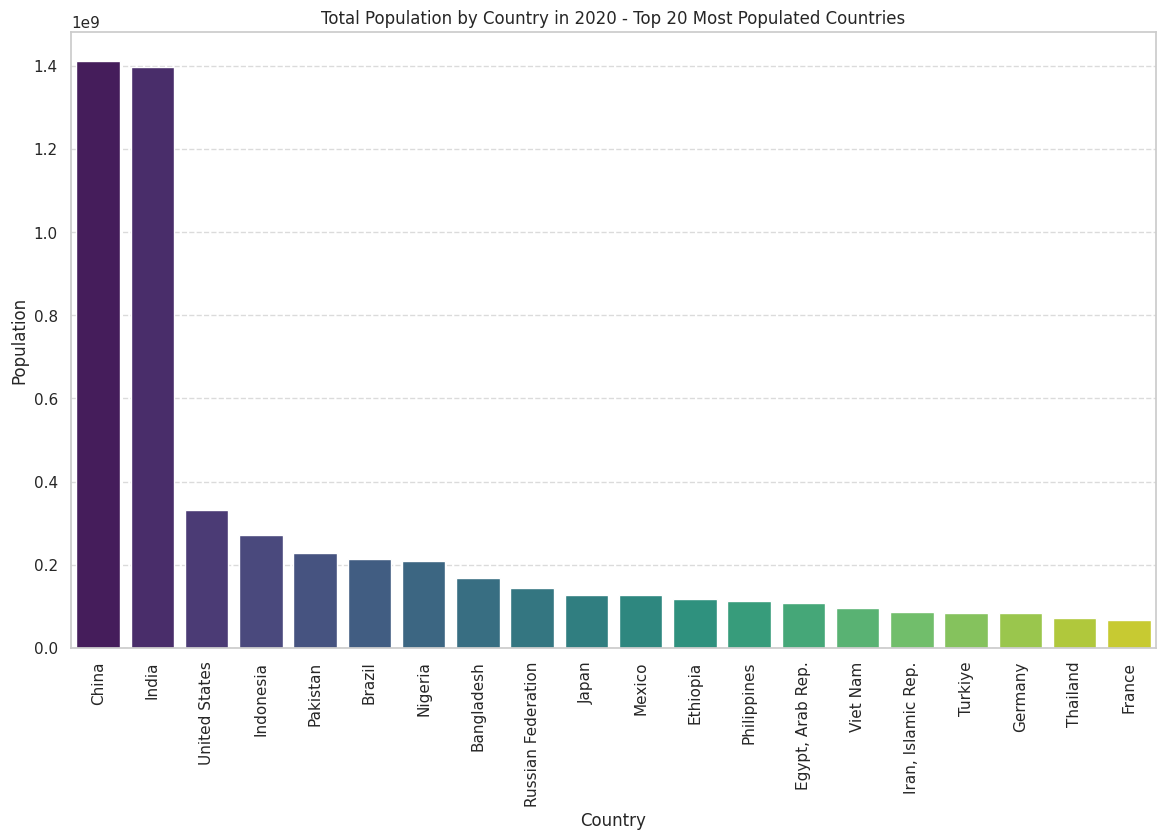

In [17]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for total population by country
plt.figure(figsize=(14, 8))
sns.barplot(x='Country Name', y='Population', data=total_population_data, palette='viridis')
plt.title(f'Total Population by Country in {year} - Top 20 Most Populated Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot for total population
plt.show()

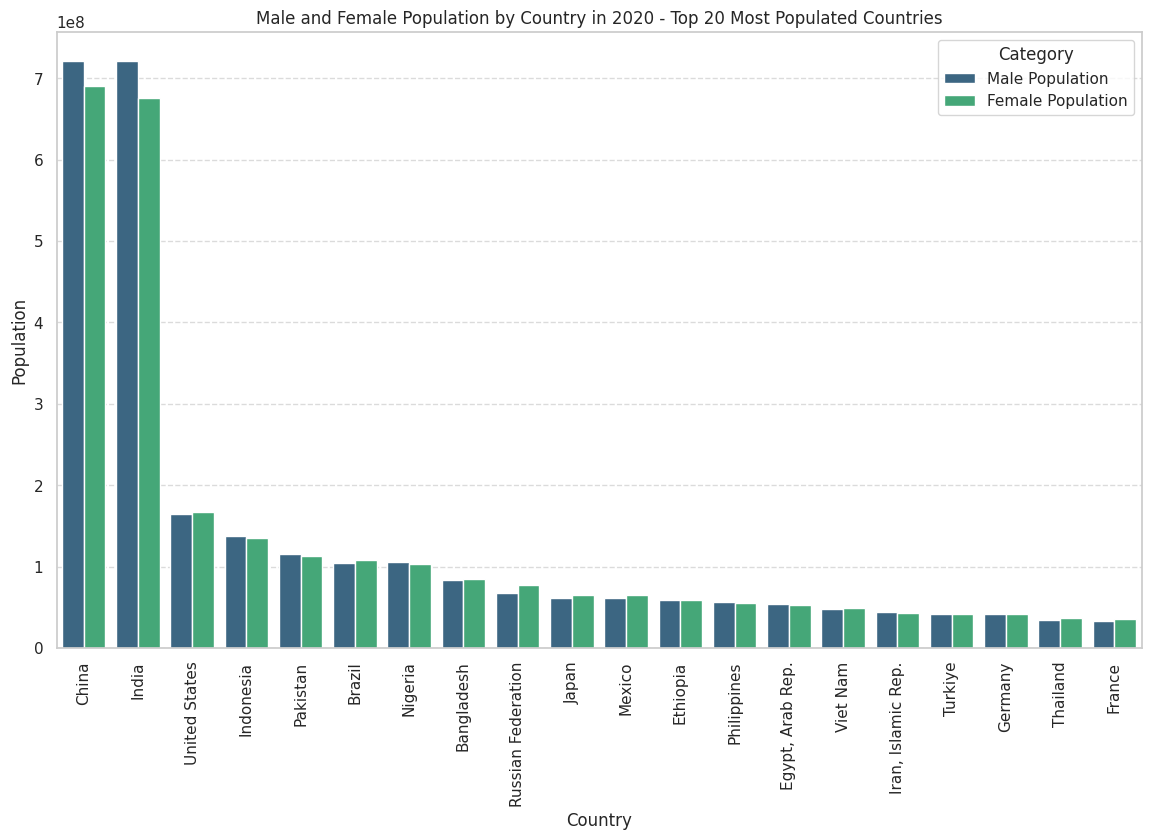

In [18]:
# Create a bar plot for male and female population by country
plt.figure(figsize=(14, 8))
sns.barplot(x='Country Name', y='Population', hue='Category', data=male_female_population_data, palette='viridis')
plt.title(f'Male and Female Population by Country in {year} - Top 20 Most Populated Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot for male and female population
plt.show()

In [19]:
# Plot Histogram
# Load your data (adjust the file path as needed)
df = pd.read_csv('/kaggle/input/population/total.csv')

# Print the column names to verify
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')


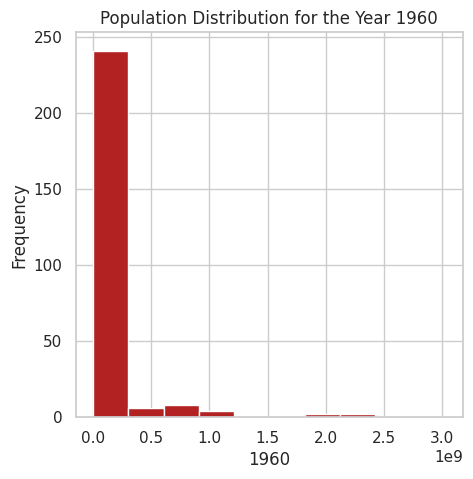

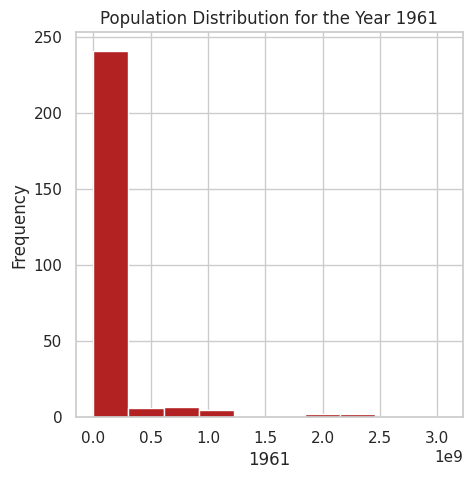

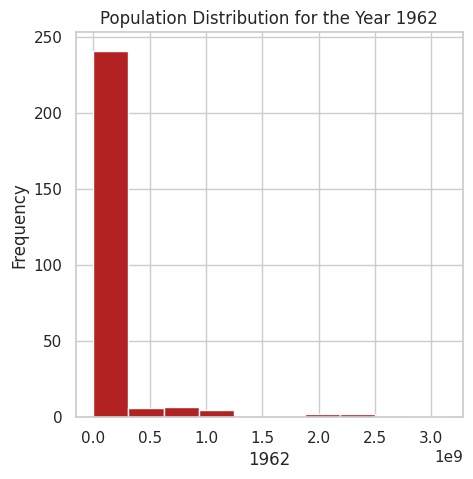

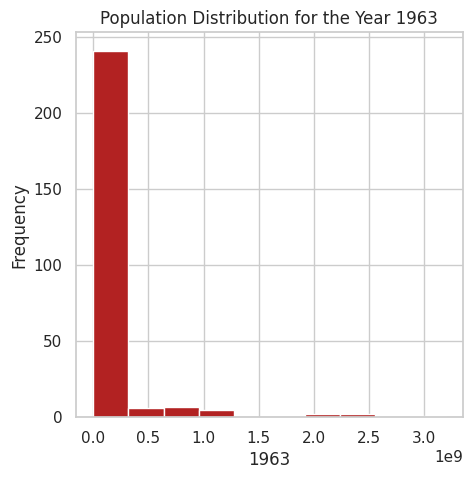

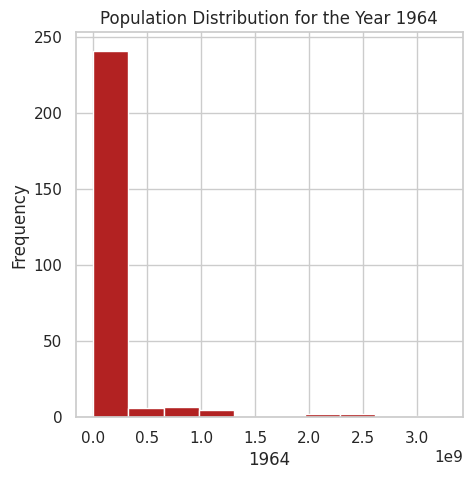

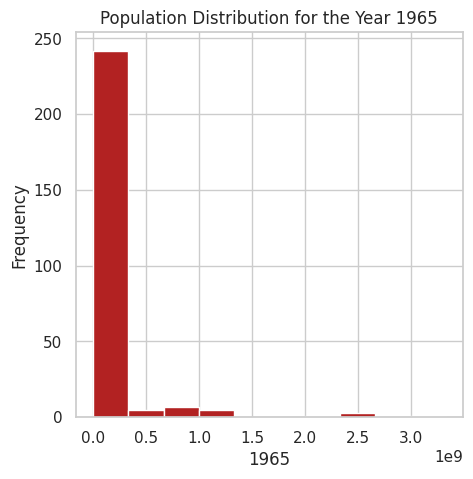

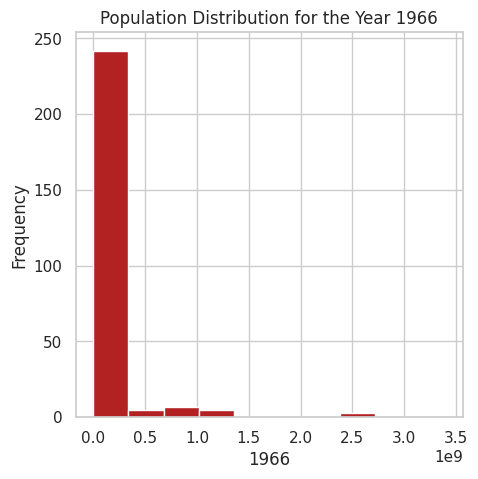

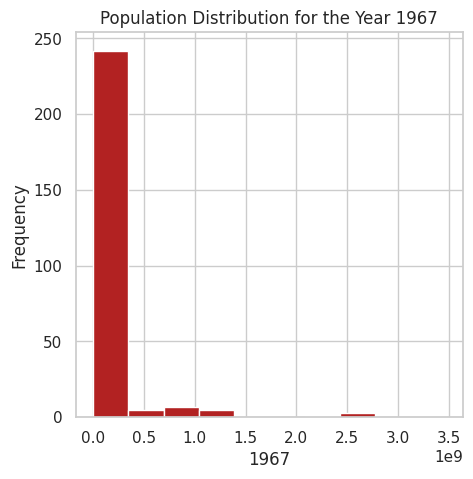

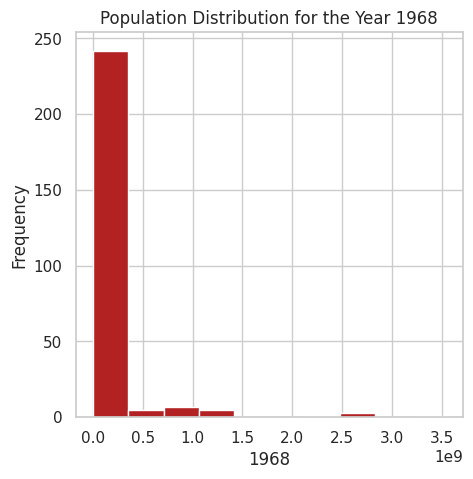

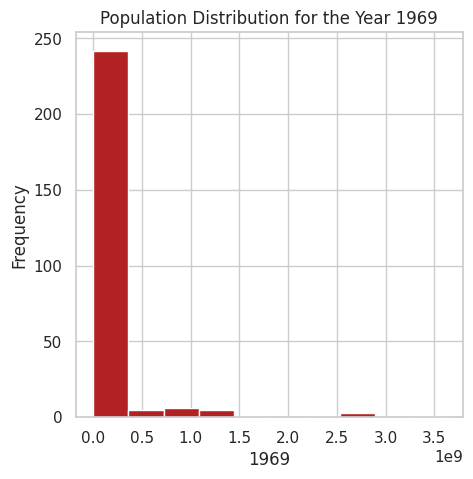

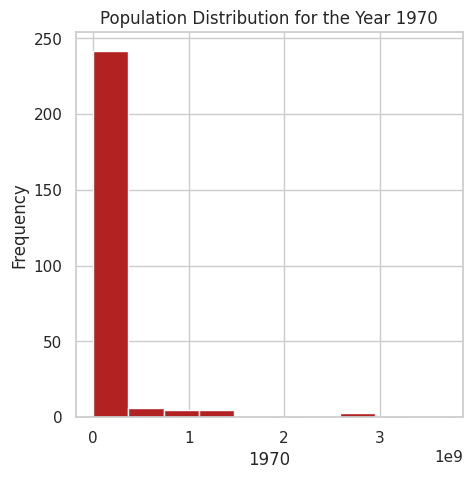

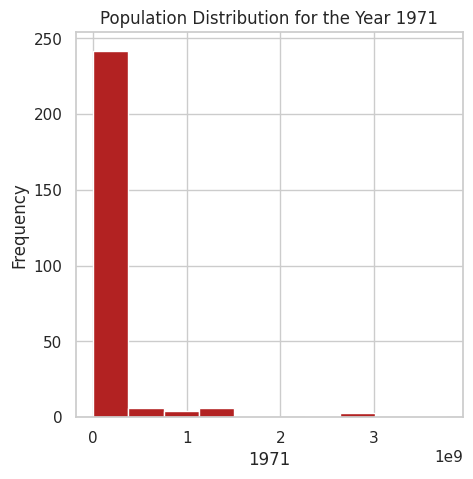

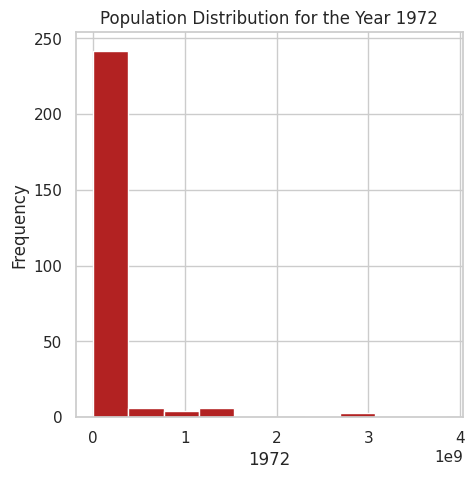

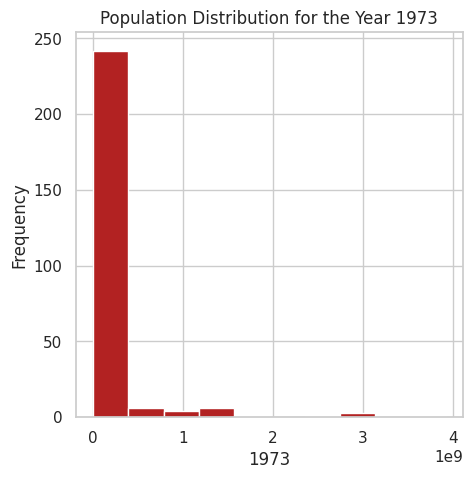

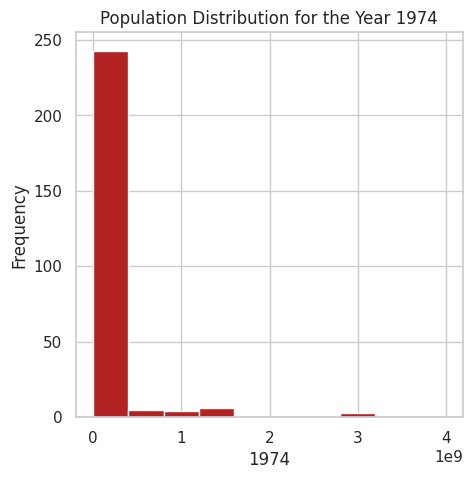

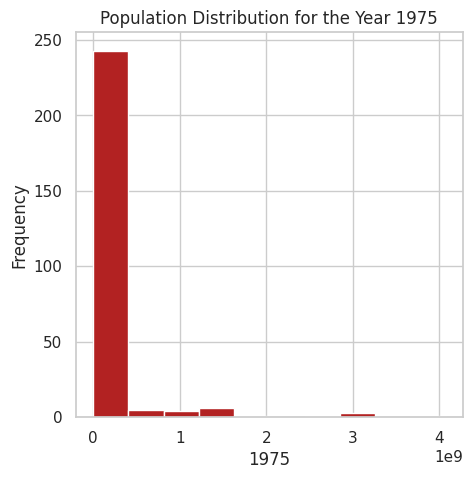

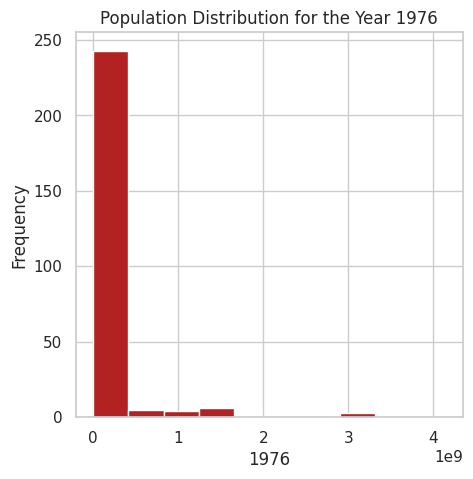

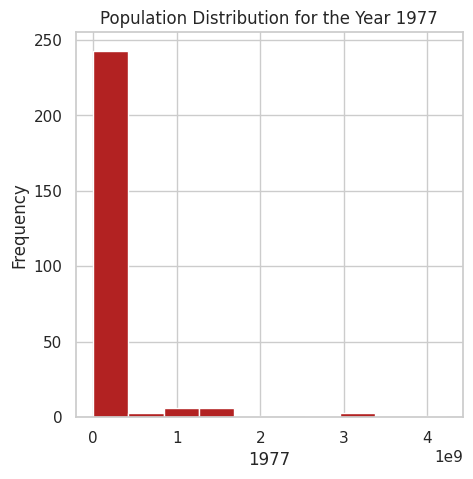

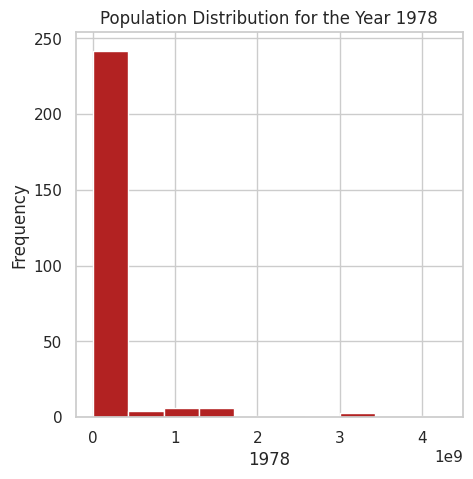

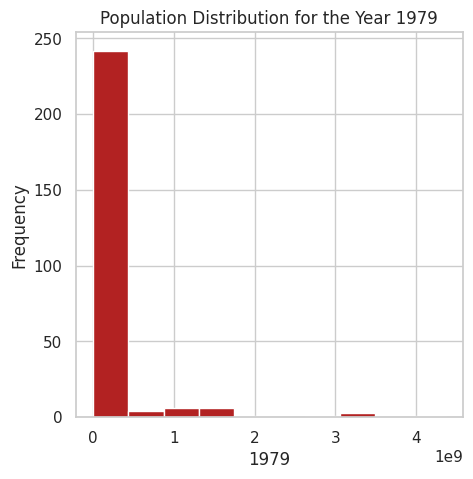

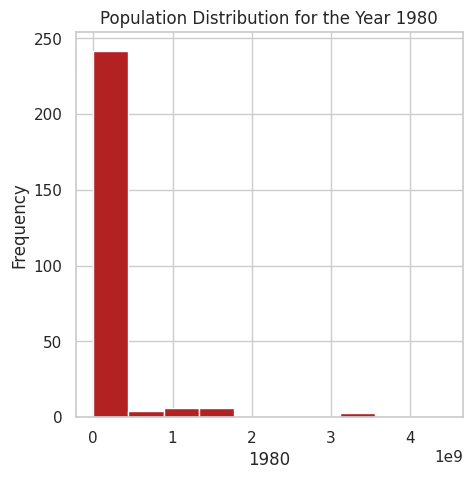

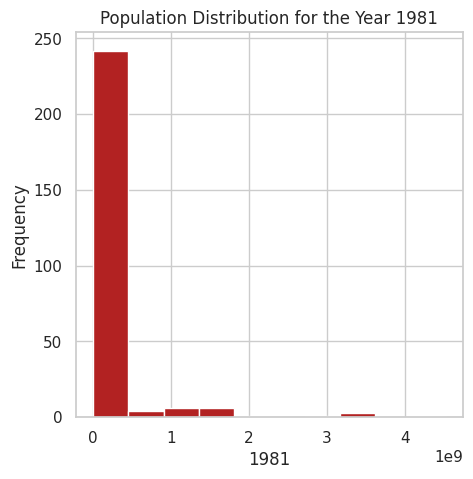

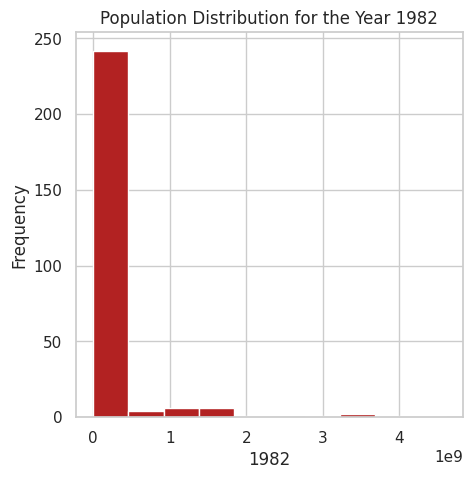

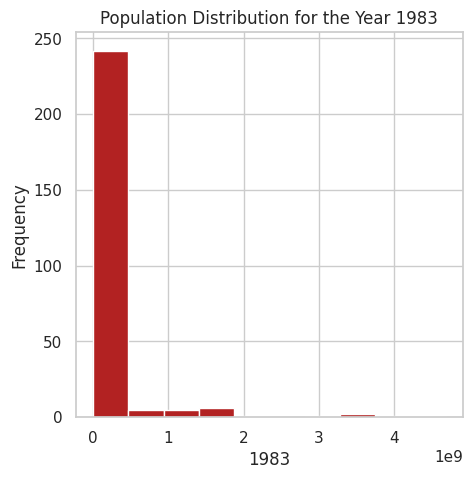

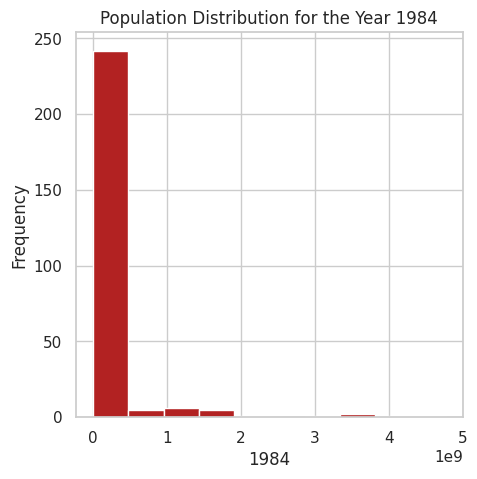

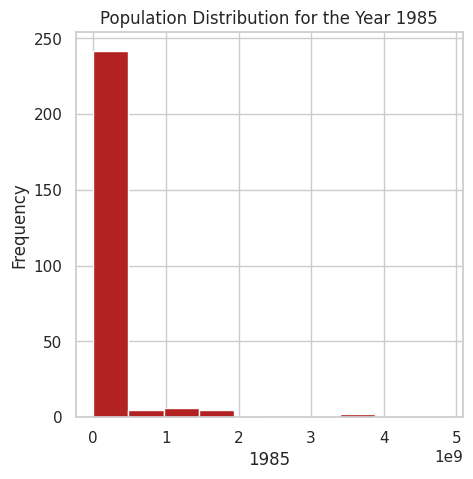

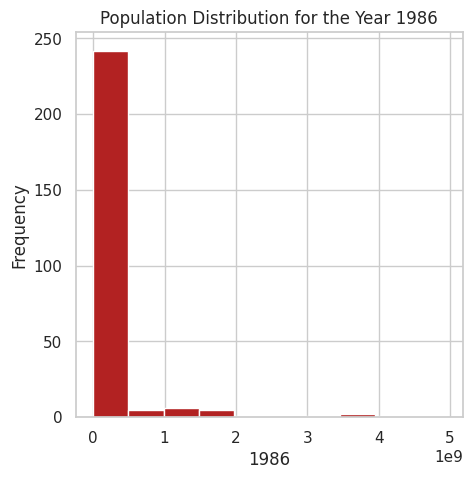

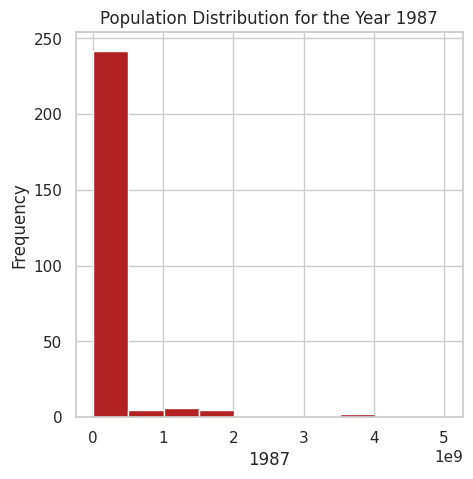

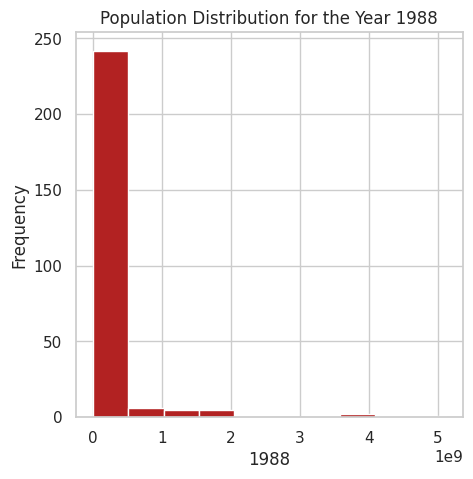

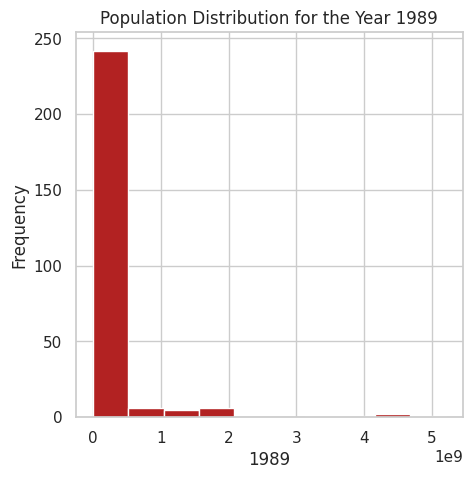

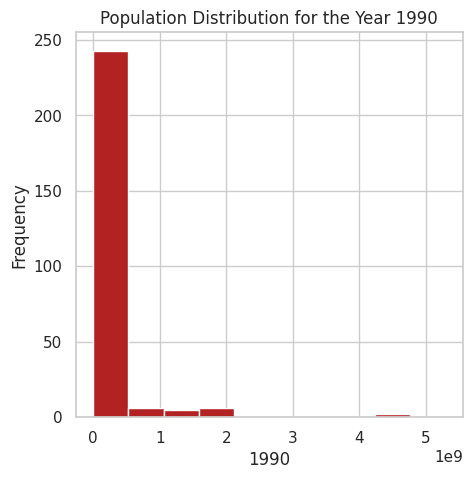

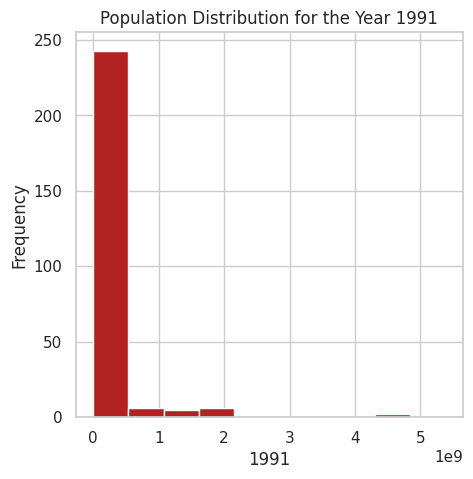

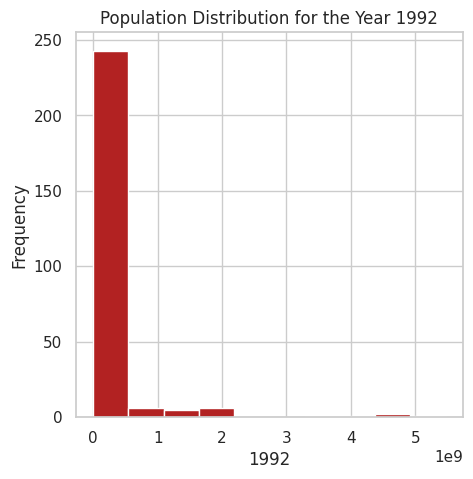

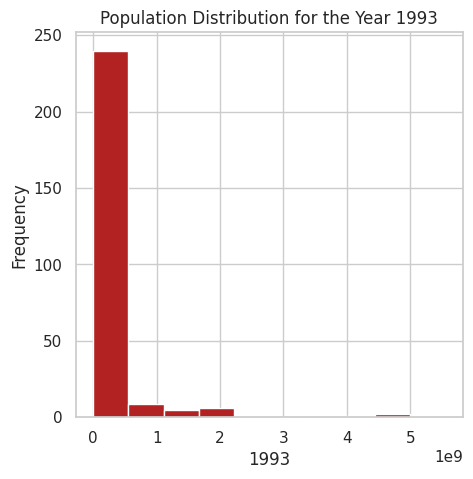

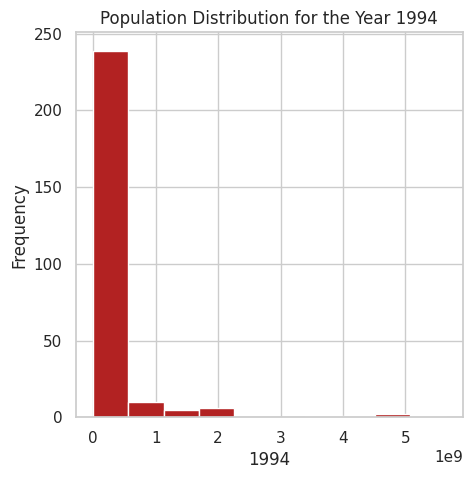

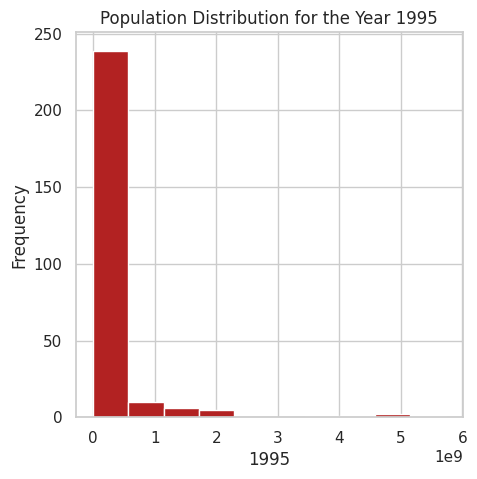

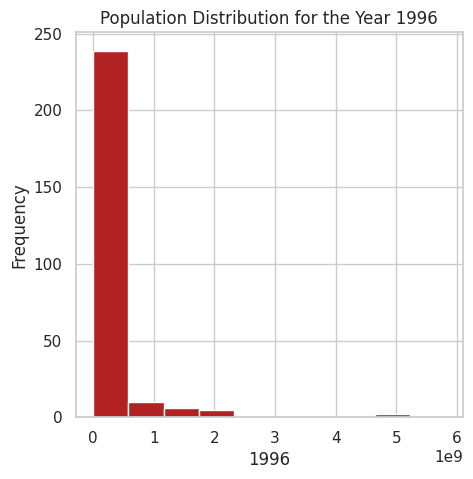

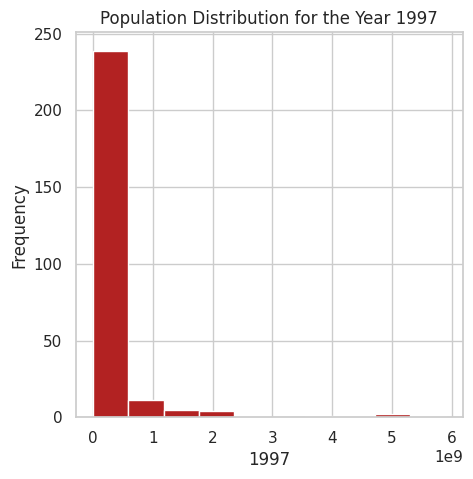

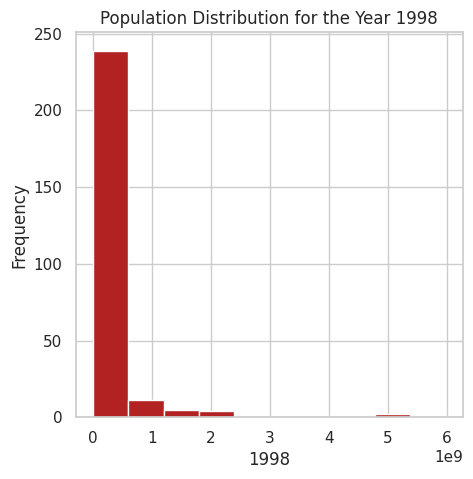

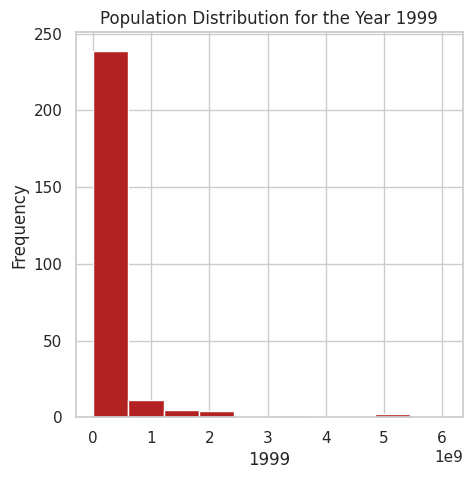

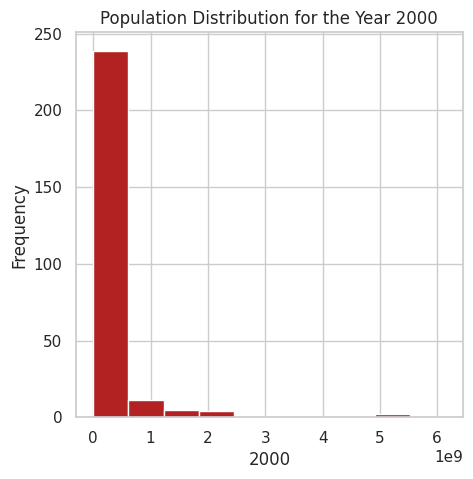

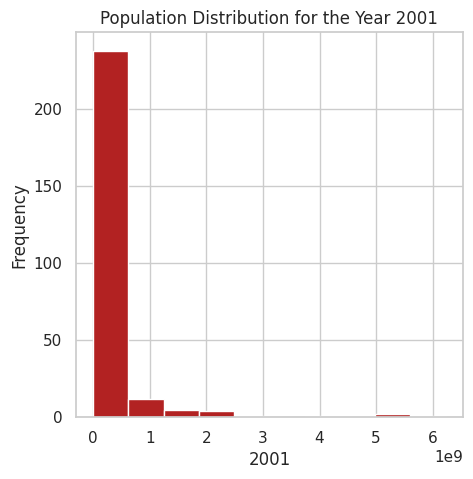

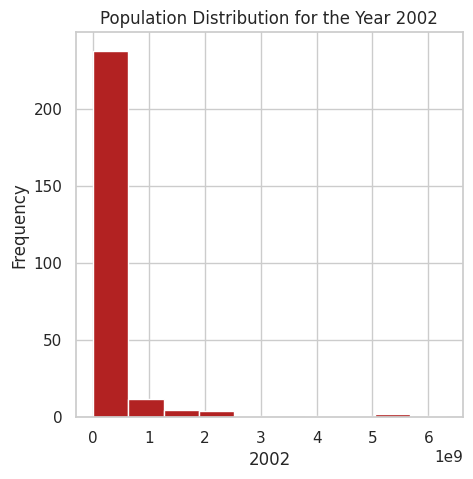

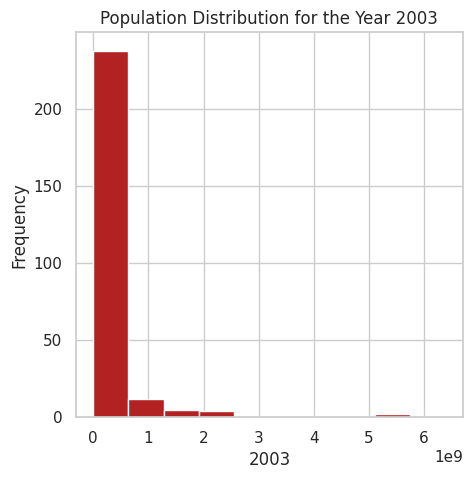

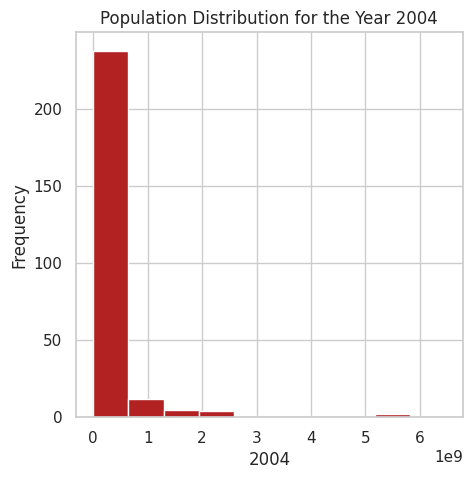

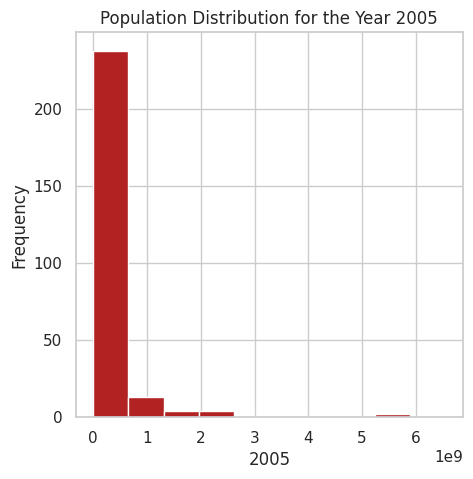

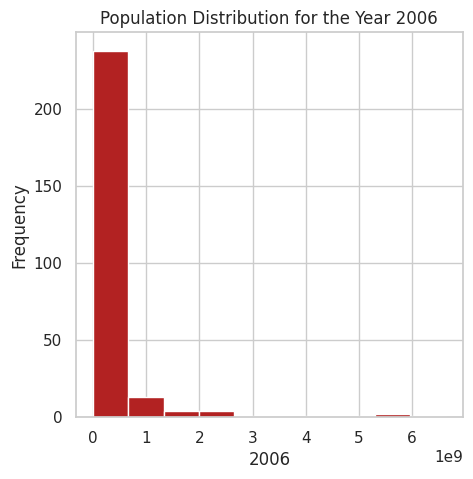

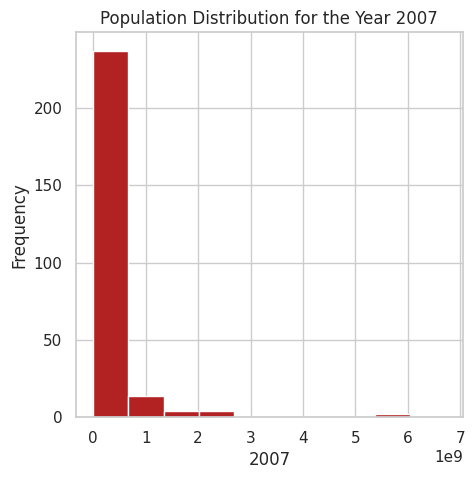

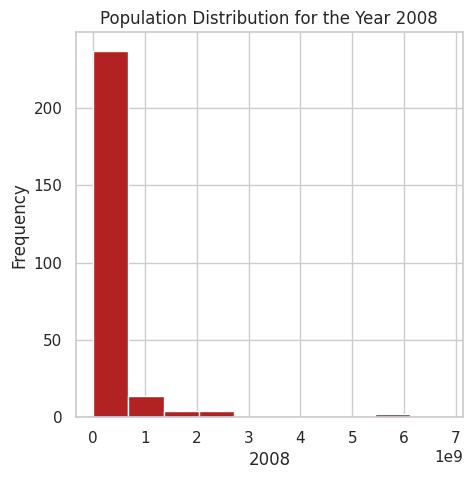

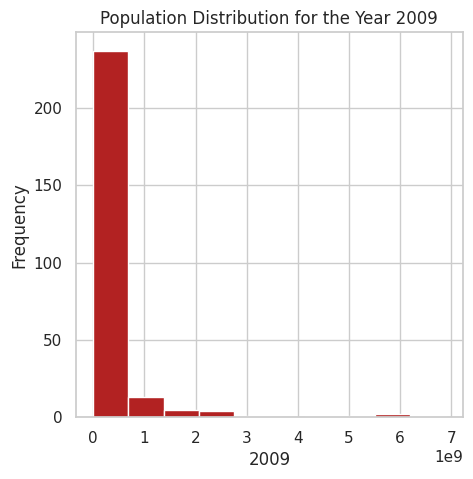

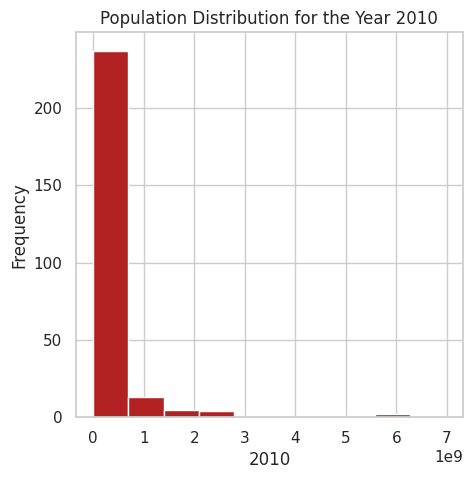

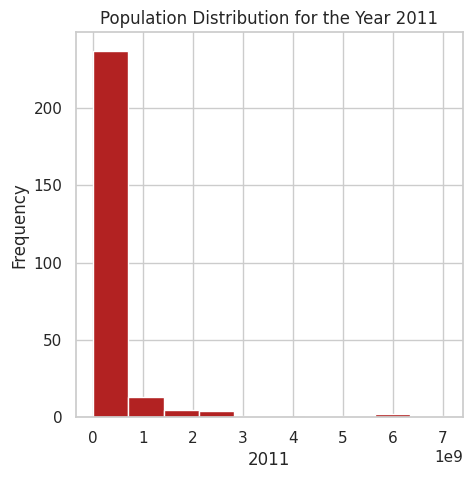

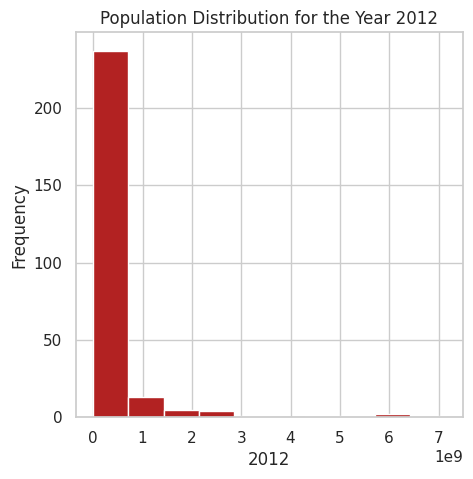

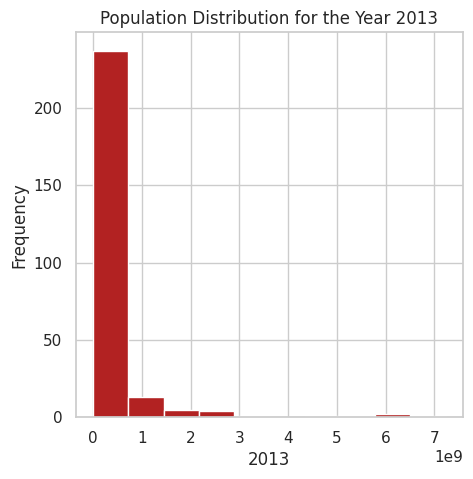

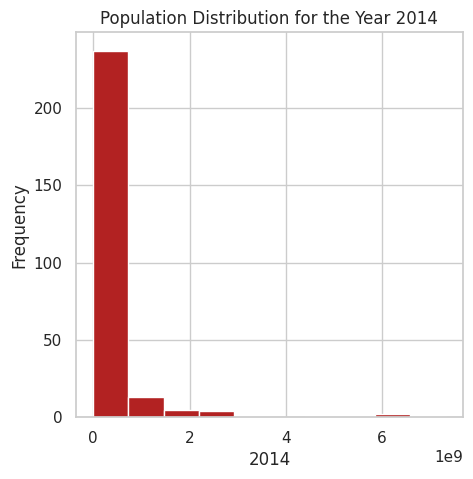

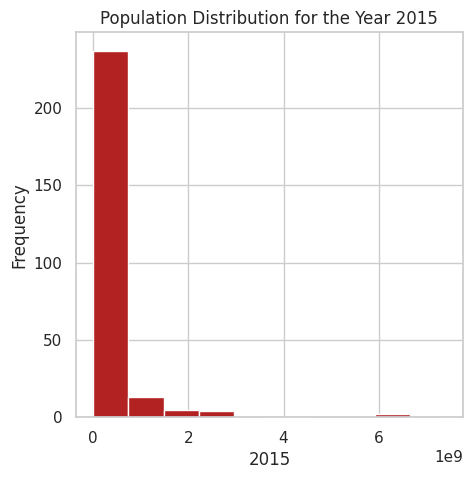

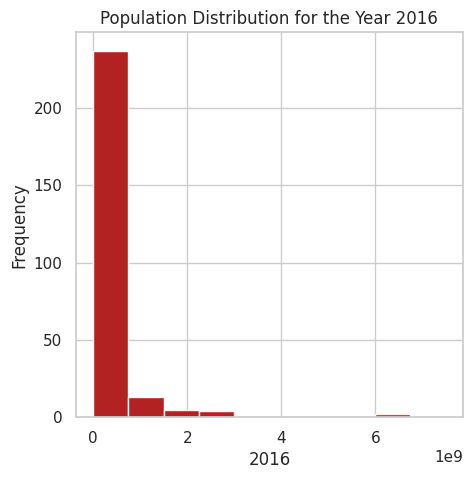

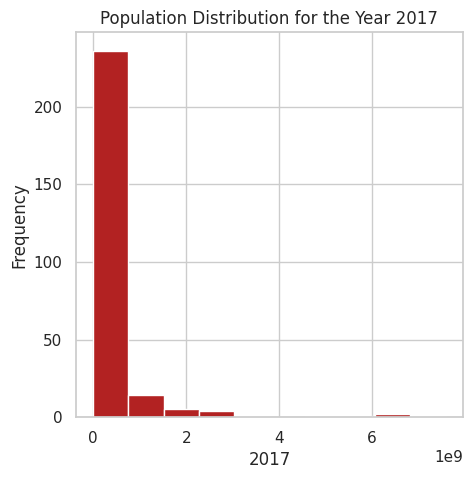

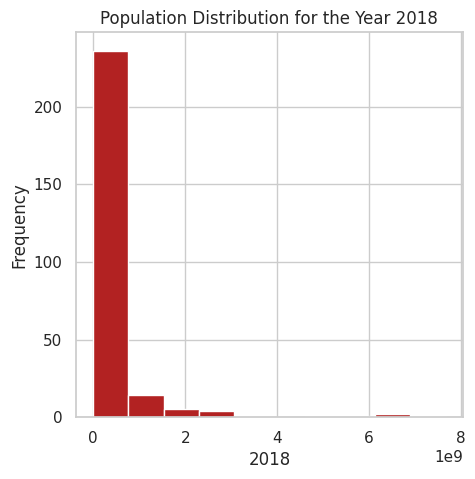

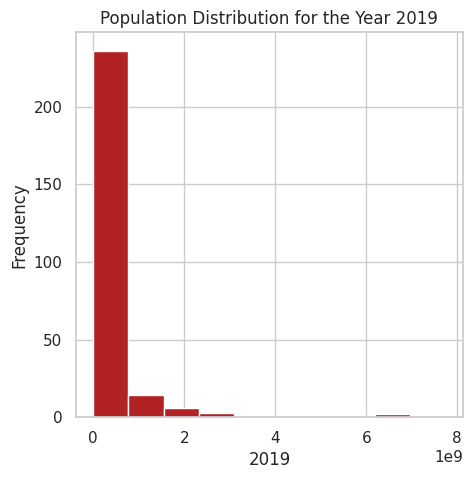

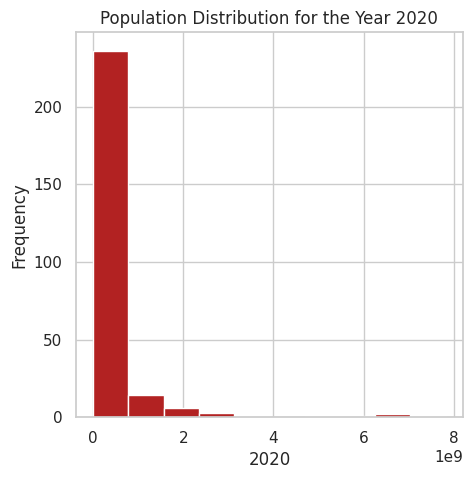

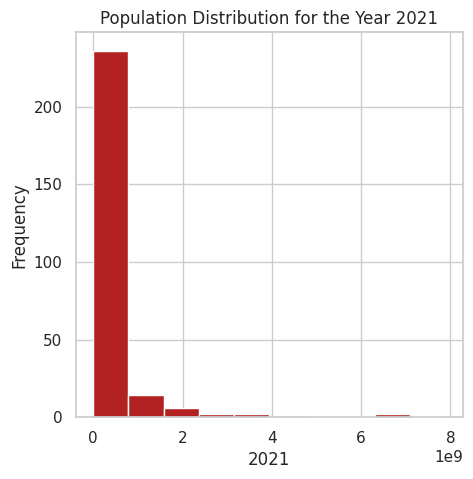

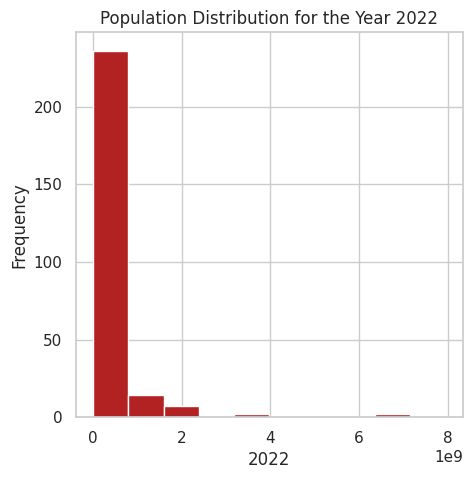

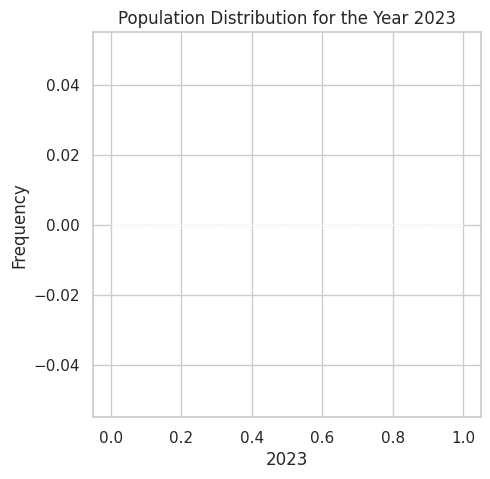

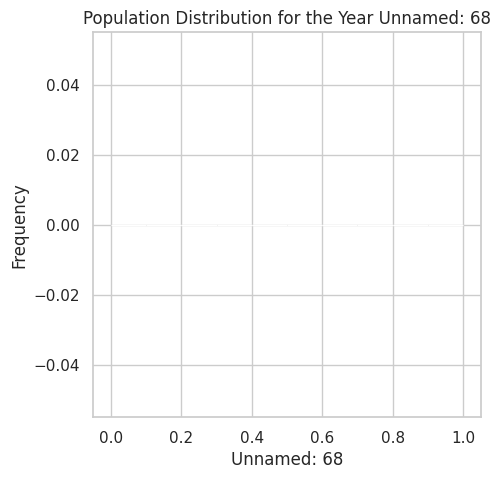

In [20]:
# Extract the years from your dataset columns (assuming they are years)
years = df.columns[4:]  # Assuming the first column is not a year column

# Loop through each year and plot histograms
for year in years:
    plt.figure(figsize=(5, 5))
    plt.hist(df[year].dropna(), color='#B22222', bins=10)
    plt.xlabel(year)
    plt.ylabel('Frequency')
    plt.title(f'Population Distribution for the Year {year}')
    plt.show()